<a href="https://colab.research.google.com/github/ramya940758/Ramya-mundru/blob/main/mundru_Assignment_3_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [11]:
!pip install nltk

In [22]:
import pandas as pd
import numpy as np
dataset= pd.read_csv('reviews_terrifier.csv')
print(dataset.columns)

Index(['Reviews'], dtype='object')


In [28]:
import pandas as pd
import numpy as np
df= pd.read_csv('baahubali_reviews.csv')
print(df.columns)

Index(['user_review'], dtype='object')


In [25]:
import pandas as pd
from nltk import ngrams, word_tokenize, pos_tag
from collections import Counter

# Load the dataset (replace 'path/to/your/dataset.csv' with the actual path)
dataset = pd.read_csv('reviews_terrifier.csv')

# Function to tokenize and get N-grams
def get_ngrams(text, n):
    tokens = word_tokenize(text)
    n_grams = ngrams(tokens, n)
    return list(n_grams)

# Step 1: Count the frequency of all the N-grams (N=3)
all_ngrams = [ngram for text in data['Reviews'] for ngram in get_ngrams(text, 3)]
ngram_counts = Counter(all_ngrams)

# Step 2: Calculate the probabilities for all bigrams
bigram_probabilities = {}
for bigram in bigrams:
    denominator = ngram_counts[bigram[:-1]]
    bigram_probabilities[bigram] = ngram_counts[bigram] / denominator if denominator != 0 else 0
# Step 3: Extract noun phrases and calculate relative probabilities
def extract_noun_phrases(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    noun_phrases = [chunk[0] for chunk in tagged_tokens if 'NN' in chunk[1]]
    return noun_phrases

noun_phrases = [noun_phrase for text in data['Reviews'] for noun_phrase in extract_noun_phrases(text)]
noun_phrase_counts = Counter(noun_phrases)
max_counts = {noun_phrase: max(noun_phrase_counts.values()) for noun_phrase in noun_phrase_counts}

# Creating a table with relative probabilities
result_table = pd.DataFrame(index=data.index, columns=noun_phrase_counts.keys())
for i, text in enumerate(data['Reviews']):
    noun_phrases_in_text = extract_noun_phrases(text)
    for noun_phrase in noun_phrase_counts.keys():
        result_table.at[i, noun_phrase] = noun_phrases_in_text.count(noun_phrase) / max_counts[noun_phrase]

# Print the result table
print(result_table)


     Terrifier      Ante      time     terms      gore    scares storyline  \
0     0.000117  0.000039  0.000039  0.000039  0.000078  0.000039  0.000039   
1          0.0       0.0       0.0       0.0  0.000039       0.0       0.0   
2     0.000078       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0  0.000039       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.000156       0.0  0.000039       0.0  0.000039       0.0       0.0   
9996  0.000078       0.0  0.000039       0.0       0.0       0.0       0.0   
9997  0.000039       0.0       0.0       0.0       0.0       0.0       0.0   
9998  0.000078       0.0       0.0       0.0       0.0       0.0       0.0   
9999       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

          film   slasher      part  ...     dread   lingers   c

In [19]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [26]:
pip install numpy scikit-learn


In [30]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the IMDb reviews dataset
df = pd.read_csv('baahubali_reviews.csv')

# Sample query (replace with your own query)
query = "Outstanding movie with great character development and brilliant acting"

# Combine the query with the existing reviews
reviews = df['user_review'].tolist()
reviews.append(query)

# Use TfidfVectorizer to build the tf*idf matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(reviews)

# Compute cosine similarity between the query and reviews
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

# Create a DataFrame to store the results
results = pd.DataFrame({
    'ReviewID': df.index,
    'CosineSimilarity': cosine_similarities[0]
})

# Sort the reviews based on cosine similarity
results = results.sort_values(by='CosineSimilarity', ascending=False)

# Display the ranked reviews
print("Ranked Reviews:")
print(results[['ReviewID', 'CosineSimilarity']])


Ranked Reviews:
    ReviewID  CosineSimilarity
8          8          0.089341
1          1          0.079516
5          5          0.073519
10        10          0.068272
9          9          0.059023
22        22          0.055492
13        13          0.052852
3          3          0.037717
15        15          0.034995
11        11          0.033462
0          0          0.032464
23        23          0.031877
4          4          0.030302
2          2          0.024100
18        18          0.022859
6          6          0.021050
16        16          0.020017
19        19          0.018826
12        12          0.013407
20        20          0.012149
7          7          0.011463
14        14          0.006330
17        17          0.000000
21        21          0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [31]:
from gensim.models import Word2Vec
import multiprocessing






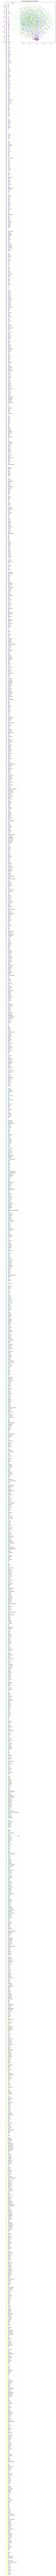

In [33]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data collected for assignment two (replace with your data)
df = pd.read_csv('baahubali_reviews.csv')

# Tokenize the text into sentences
text = [str(sentence).split() for sentence in df['user_review']]

# Train a Word2Vec model
embedding_model = Word2Vec(text, vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embeddings using t-SNE
def visualize_embeddings(model):
    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(word_vectors)

    df_embeddings = pd.DataFrame(embeddings_2d, columns=['X', 'Y'])
    df_embeddings['Word'] = words

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='X', y='Y', data=df_embeddings, hue='Word', palette='viridis', alpha=0.7)
    plt.title('Word Embedding Visualization')
    plt.show()

# Visualize the embeddings
visualize_embeddings(embedding_model)


# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file



# Link:  https://github.com/ramya940758/Ramya-mundru/blob/main/reviews_terrifier_annotated.csv



